## SARS-2 Austria 

C. Möstl, Graz, https://twitter.com/chrisoutofspace

data source for Austria
https://orf.at/corona/stories/3157533/

data source for South Korea
https://www.worldometers.info/coronavirus/country/south-korea/

for converting to script on the command line: jupyter nbconvert --to script plot_cases.ipynb

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sunpy.time import parse_time
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import set_input_here


import importlib
importlib.reload(set_input_here)
from set_input_here import t_start_string, t_end_string, cases_list, filename, country, south_korea_offset

def expon(x, a, k, b):
    return a*np.exp(k*x) + b

def linear(x, k, b):
    return k*x + b


def gaussian(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))



sns.set_style('darkgrid')
sns.set_context('paper')   

print(country)
print(t_start_string)
print(t_end_string)
print(cases_list)
print(south_korea_offset)

Austria
2020-02-25 23:00
2020-03-22 23:00
[2, 2, 3, 3, 9, 14, 18, 21, 29, 41, 55, 79, 104, 131, 182, 246, 302, 504, 655, 860, 1016, 1332, 1646, 2053, 2388, 2814, 3244]
20



### Austria

In [10]:
t_start=parse_time(t_start_string).datetime
t_end=parse_time(t_end_string).datetime

dates=parse_time([t_start + datetime.timedelta(days=1*n) for n in range((t_end - t_start).days+1)]).datetime
cases=np.array(cases_list)

print(parse_time(dates).iso)
print(cases)

dates1=parse_time(dates).plot_date
dates1=dates1-dates1[0] 



t_end2=parse_time('2020-04-13 23:00').datetime

dates_fut=parse_time([t_start + datetime.timedelta(days=n) for n in range((t_end2 - t_start).days)]).plot_date
dates_fut1=dates_fut-dates_fut[0]

now=datetime.datetime.utcnow().strftime("%Y-%b-%d %H:%M")
#now=dates[-1].strftime("%Y-%b-%d %H:%M")

['2020-02-25 23:00:00.000' '2020-02-26 23:00:00.000'
 '2020-02-27 23:00:00.000' '2020-02-28 23:00:00.000'
 '2020-02-29 23:00:00.000' '2020-03-01 23:00:00.000'
 '2020-03-02 23:00:00.000' '2020-03-03 23:00:00.000'
 '2020-03-04 23:00:00.000' '2020-03-05 23:00:00.000'
 '2020-03-06 23:00:00.000' '2020-03-07 23:00:00.000'
 '2020-03-08 23:00:00.000' '2020-03-09 23:00:00.000'
 '2020-03-10 23:00:00.000' '2020-03-11 23:00:00.000'
 '2020-03-12 23:00:00.000' '2020-03-13 23:00:00.000'
 '2020-03-14 23:00:00.000' '2020-03-15 23:00:00.000'
 '2020-03-16 23:00:00.000' '2020-03-17 23:00:00.000'
 '2020-03-18 23:00:00.000' '2020-03-19 23:00:00.000'
 '2020-03-20 23:00:00.000' '2020-03-21 23:00:00.000'
 '2020-03-22 23:00:00.000']
[   2    2    3    3    9   14   18   21   29   41   55   79  104  131
  182  246  302  504  655  860 1016 1332 1646 2053 2388 2814 3244]


#### Exponential and Gaussian fits

In [11]:
#exponential fit for total cases
#for morning numbers
#param = scipy.optimize.curve_fit(expon, dates1[0:-1], cases[0:-1] )
#afternoon numbers
param = scipy.optimize.curve_fit(expon, dates1, cases )
p1=param[0][0]
p2=param[0][1]
p3=param[0][2]
fit=expon(dates_fut1,p1,p2,p3)

print()
print('Exponential fit parameters:',param[0])

#gaussian fits for daily new cases
newcases=np.gradient(cases)
paramg = scipy.optimize.curve_fit(gaussian, dates1, newcases )
ygfit=gaussian(dates_fut1,paramg[0][0],paramg[0][1],paramg[0][2])
#plt.plot_date(dates,newcases)
#plt.plot_date(dates_fut,ygfit,'-k')
print('Gaussian fit parameters:',paramg[0])


Exponential fit parameters: [ 26.06345486   0.18837064 -91.06519746]
Gaussian fit parameters: [430.99960709  26.41733803   6.30023874]


### South Korea

In [12]:
t_start_sk=parse_time('2020-02-15 20:00').datetime
t_end_sk=parse_time('2020-03-18 20:00').datetime

t_start_sk=t_start_sk+datetime.timedelta(days=south_korea_offset)
t_end_sk=t_end_sk+datetime.timedelta(days=south_korea_offset)

dates_sk=parse_time([t_start_sk + datetime.timedelta(days=1*n) for n in range((t_end_sk - t_start_sk).days)]).datetime
dates_sk1=parse_time([t_start_sk + datetime.timedelta(days=1*n) for n in range((t_end_sk - t_start_sk).days)]).plot_date
dates_sk1=dates_sk1-dates_sk1[0] 

print(parse_time(dates_sk).iso)
cases_sk=np.array([28, 29, 30, 31, 58, 111, 209, 436,602, 833, 977, 1261, 1766, 2337,\
                   3150,3736, 4335,5186,5621,6284,6593,7041,7313,7478,7513,7755,7869,\
                   7979,8086,8162,8236,8320])
newcases_sk=np.gradient(cases_sk)
#print(cases_sk)
#print(len(cases_sk),len(dates_sk))


#gaussian fits for daily new cases South Korea
newcases_sk=np.gradient(cases_sk)
print(dates_sk1)
print(cases_sk)
paramg_sk = scipy.optimize.curve_fit(gaussian, dates_sk1, newcases_sk )
ygfit_sk=gaussian(dates_sk1,paramg_sk[0][0],paramg_sk[0][1],paramg_sk[0][2])
#plt.plot_date(dates,newcases)
#plt.plot_date(dates_fut,ygfit,'-k')
print('Gaussian fit parameters:',paramg_sk[0])


['2020-03-06 20:00:00.000' '2020-03-07 20:00:00.000'
 '2020-03-08 20:00:00.000' '2020-03-09 20:00:00.000'
 '2020-03-10 20:00:00.000' '2020-03-11 20:00:00.000'
 '2020-03-12 20:00:00.000' '2020-03-13 20:00:00.000'
 '2020-03-14 20:00:00.000' '2020-03-15 20:00:00.000'
 '2020-03-16 20:00:00.000' '2020-03-17 20:00:00.000'
 '2020-03-18 20:00:00.000' '2020-03-19 20:00:00.000'
 '2020-03-20 20:00:00.000' '2020-03-21 20:00:00.000'
 '2020-03-22 20:00:00.000' '2020-03-23 20:00:00.000'
 '2020-03-24 20:00:00.000' '2020-03-25 20:00:00.000'
 '2020-03-26 20:00:00.000' '2020-03-27 20:00:00.000'
 '2020-03-28 20:00:00.000' '2020-03-29 20:00:00.000'
 '2020-03-30 20:00:00.000' '2020-03-31 20:00:00.000'
 '2020-04-01 20:00:00.000' '2020-04-02 20:00:00.000'
 '2020-04-03 20:00:00.000' '2020-04-04 20:00:00.000'
 '2020-04-05 20:00:00.000' '2020-04-06 20:00:00.000']
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]
[  28   29   30   31

current total cases Austria 3244


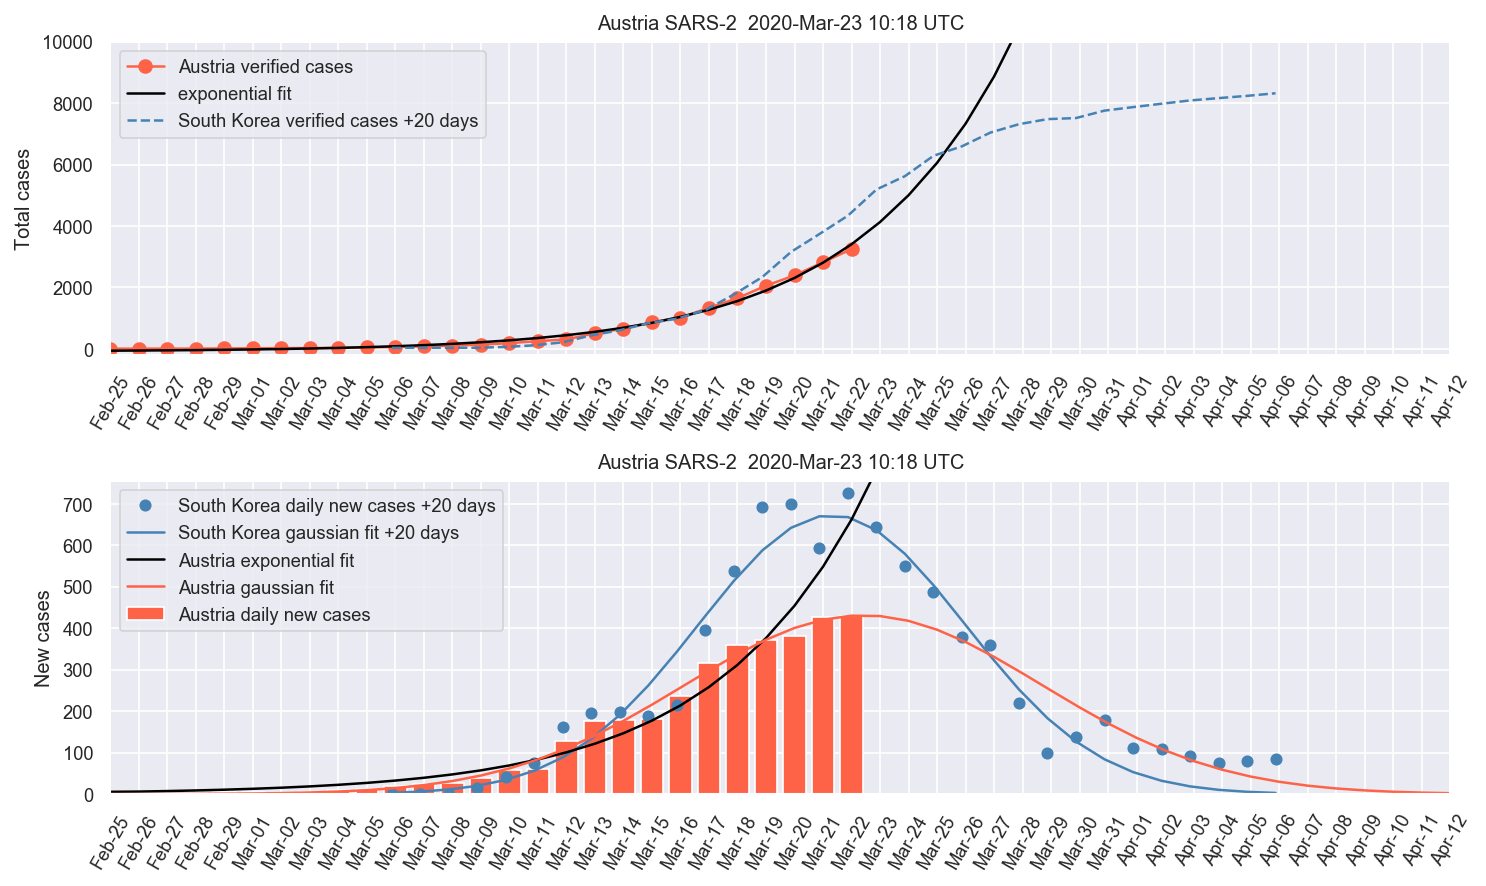

In [16]:
plt.figure(1,figsize=(10,6),dpi=150)
ax1 = plt.subplot(211) 

ax1.plot(dates,cases,marker='o',color='tomato',label=country+' verified cases',markersize=6)
ax1.plot(dates_fut,fit,linestyle='-',color='k',label='exponential fit')
#ax2.plot(dates_fut,np.gradient(fitl),color='black',label='linear fit')
ax1.plot(dates_sk,cases_sk,linestyle='--',color='steelblue',label='South Korea verified cases +'+str(south_korea_offset)+' days')


ax1.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )
ax1.set_xlim([dates_fut[0],dates_fut[-1]])
plt.xticks(rotation=60)
plt.ylabel('Total cases')
plt.ylim(-200,10000)
plt.title(country+' SARS-2  '+now+ ' UTC')
plt.legend()
ax1.set_xticks(dates_fut)


ax2 = plt.subplot(212) 

ax2.plot(dates_sk,np.gradient(cases_sk),linestyle='',marker='o',color='steelblue',label='South Korea daily new cases +'+str(south_korea_offset)+' days')
#ax2.bar(dates_sk,np.gradient(cases_sk),color='steelblue',label='South Korea daily new cases +'+str(south_korea_offset)+' days')
ax2.plot(dates_sk,ygfit_sk,'steelblue',label='South Korea gaussian fit +'+str(south_korea_offset)+' days')

ax2.bar(dates,np.gradient(cases),color='tomato',label=country+' daily new cases')
ax2.plot(dates_fut,np.gradient(fit),color='black',label=country+' exponential fit')
ax2.plot(dates_fut,ygfit,color='tomato',linestyle='-',label=country+' gaussian fit')

ax2.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )

plt.xticks(rotation=60)
plt.ylabel('New cases')
ax2.set_xlim([dates_fut[0],dates_fut[-1]])
plt.title(country+' SARS-2  '+now + ' UTC')
ax2.set_xticks(dates_fut)
plt.ylim(0,np.max(np.gradient(cases_sk))+30)

plt.legend(loc=2)

plt.tight_layout()
print('current total cases '+country,cases[-1])

plt.savefig(filename)